In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from collections import Counter
from tensorflow.keras.preprocessing.image import load_img, img_to_array, save_img
from tensorflow.keras.utils import image_dataset_from_directory
import numpy as np
import os
import shutil
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
path = "../dataset_blood_group"

In [3]:
# Step 1: Loading Dataset
dataset = image_dataset_from_directory(
    path,
    labels="inferred",
    image_size=(64, 64), 
    batch_size=32,
    shuffle=True
)

Found 6000 files belonging to 8 classes.


In [4]:
# Step 2: Check class distribution
class_names = dataset.class_names
class_counts = Counter()
for _, labels in dataset.unbatch():
    class_counts[int(labels.numpy())] += 1

print("Class Distribution")
for i, count in class_counts.items():
    print(f"{class_names[i]}: {count}")

Class Distribution
O+: 852
AB-: 761
O-: 712
A-: 1009
AB+: 708
B+: 652
A+: 565
B-: 741


In [11]:
import matplotlib.pyplot as plt
def plot_class_distribution(class_names, class_counts):
    classes = [class_names[i] for i in class_counts.keys()]
    counts = [class_counts[i] for i in class_counts.keys()]

    plt.figure(figsize=(10, 6))
    plt.bar(classes, counts, color=['skyblue', 'lightcoral', 'lightgreen', 'yellow', 'lightpink', 'lightblue', 'grey', 'salmon'])  # Customize colors as needed
    plt.xlabel("Blood Groups")
    plt.ylabel("Number of Individuals")
    plt.title("Distribution of Blood Groups")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability if needed
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()

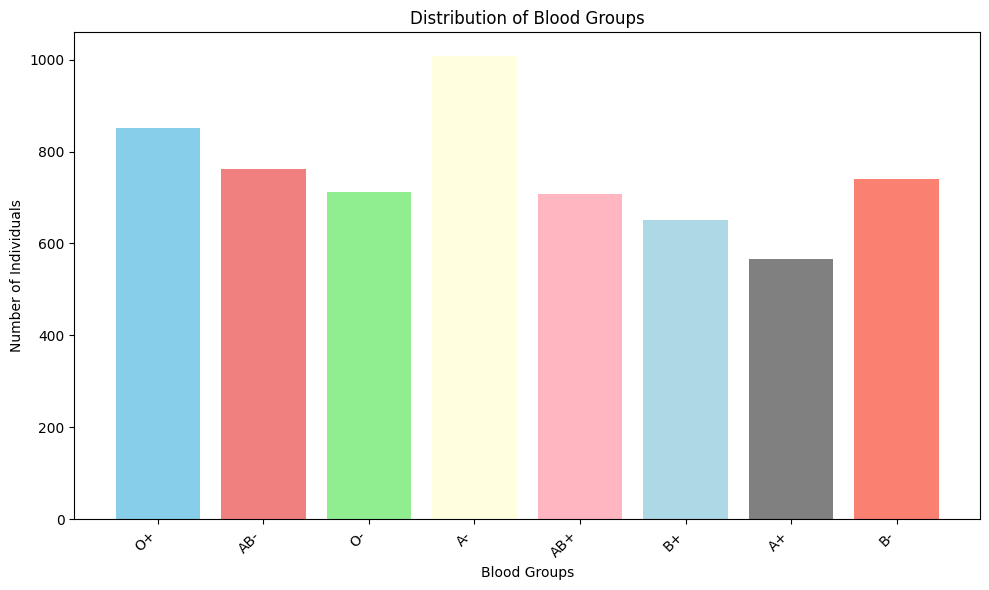

In [10]:
plot_class_distribution(class_names, class_counts)